
# Algoritmos basados en árboles de decisión
Los algoritmos basados en árboles de decisión también son de aprendizaje supervisado y se pueden usar para tareas de regresión o clasificación.

El nombre de esta familia se debe a que usan una estructura básica, los árboles precisamente, que con simples reglas de decisión aplicadas sobre los datos les permite generar predicciones.

* Aprenden de los datos con reglas if-else en cada nodos. 

* Cada nodo representa una pregunta sobre los datos y cada rama del árbol representa una respuesta a esa pregunta. 

* El proceso continúa hasta que se llega a una hoja del árbol, que representa la predicción final.

* Desventaja:  Tendencia al sobreajuste u overfitting, lo que significa que pueden ajustarse demasiado a los datos de entrenamiento y no generalizar bien para nuevos datos. Esto se puede prevenir mediante técnicas de poda o regularización.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# mostrar información del DataFrame
def info(df):
    display(df.head(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print('Duplicated: ',df.duplicated().sum())
    print()
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))


In [4]:
#dataset 
# https://www.kaggle.com/code/komalkhetlani/deep-analysis-of-travel-insurance-data

df = pd.read_csv('./datasets/train_house_price.csv')


In [5]:
info(df)

,last_price,total_area,bedrooms,ceiling_height,floors_total,living_area,floor,bike_parking,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest
0,108000.0,59.0,2,2.87,4,31.5,2,0,0,0,6.6,0,20485,8180
1,264000.0,109.0,4,3.15,5,72.0,2,0,0,0,12.2,0,42683,8643
2,140000.0,74.5,3,2.58,10,49.0,9,0,0,0,10.8,0,14078,16670
3,64000.0,37.4,1,2.50,9,20.0,4,0,0,0,6.2,2,17792,17699
4,133000.0,64.9,3,2.65,12,41.9,11,0,0,0,10.4,0,14767,10573
5,94000.0,63.2,3,2.60,9,44.0,2,0,0,0,7.2,1,20271,19273
6,175000.0,65.0,2,2.65,17,32.0,3,0,0,0,11.0,1,35452,15458
7,152000.0,72.0,3,2.50,10,42.0,5,0,0,0,8.0,1,10402,14768
8,63800.0,33.8,1,2.50,9,19.0,8,0,0,0,7.1,0,45657,16608
9,110000.0,51.2,2,2.90,4,31.5,2,0,0,0,7.8,0,14963,10770



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           6495 non-null   float64
 1   total_area           6495 non-null   float64
 2   bedrooms             6495 non-null   int64  
 3   ceiling_height       6495 non-null   float64
 4   floors_total         6495 non-null   int64  
 5   living_area          6495 non-null   float64
 6   floor                6495 non-null   int64  
 7   bike_parking         6495 non-null   int64  
 8   studio               6495 non-null   int64  
 9   open_plan            6495 non-null   int64  
 10  kitchen_area         6495 non-null   float64
 11  balcony              6495 non-null   int64  
 12  airports_nearest     6495 non-null   int64  
 13  cityCenters_nearest  6495 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 710.5 KB
None

         last_price   total_area  

In [6]:
# variables categóricas
# 1. price_class: 1 si el precio es mayor que la mediana, 0 en otro caso    
 
df.loc[df['last_price'] > df['last_price'].median(), 'price_class'] = 1
df.loc[df['last_price'] <= df['last_price'].median(), 'price_class'] = 0
print(df.head())

   last_price  total_area  bedrooms  ceiling_height  floors_total  \
0    108000.0        59.0         2            2.87             4   
1    264000.0       109.0         4            3.15             5   
2    140000.0        74.5         3            2.58            10   
3     64000.0        37.4         1            2.50             9   
4    133000.0        64.9         3            2.65            12   

   living_area  floor  bike_parking  studio  open_plan  kitchen_area  balcony  \
0         31.5      2             0       0          0           6.6        0   
1         72.0      2             0       0          0          12.2        0   
2         49.0      9             0       0          0          10.8        0   
3         20.0      4             0       0          0           6.2        2   
4         41.9     11             0       0          0          10.4        0   

   airports_nearest  cityCenters_nearest  price_class  
0             20485                 8180  

In [7]:
# variables objetivo y características  

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']


In [8]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier() # Crear el modelo
model.fit(features, target) # Ajustar el modelo


DecisionTreeClassifier()

### 2 características

1. El primer apartamento tiene 12 dormitorios con una superficie total de 900 m². La superficie de la sala de estar es de 409.7 m² y la superficie de la cocina es de 112 m².
2. El segundo apartamento tiene 2 dormitorios con una superficie total de 109 m². La superficie de la sala de estar es de 32 m² y la de la cocina es de 40.5 m².

In [9]:

new_features = pd.DataFrame( # Crear 2 nuevas características
    [
        [None, None, 2.8, 25, None, 25, 0, 0, 0, None, 0, 30706.0, 7877.0],
        [None, None, 2.75, 25, None, 25, 0, 0, 0, None, 0, 36421.0, 9176.0]
    ],
    columns=features.columns
)

new_features.loc[0, 'total_area'] = 900.0 # Asignar valores a las características
new_features.loc[0, 'bedrooms'] = 12
new_features.loc[0, 'living_area'] = 409.7
new_features.loc[0, 'kitchen_area'] = 112.0

new_features.loc[1, 'total_area'] = 109.0
new_features.loc[1, 'bedrooms'] = 2
new_features.loc[1, 'living_area'] = 32.0
new_features.loc[1, 'kitchen_area'] = 40.5

answers = model.predict(new_features)
print(answers)
print(model)

[1. 0.]
DecisionTreeClassifier()


1. El conjunto de datos de entrenamiento se almacena en las variables **features** y **target**.
2. Las características de las nuevas observaciones se registran en la variable **new_features**.
3. El método **fit()** se usa para entrenamiento, y el método **predict()** se usa para prueba.
4. El modelo se almacena en la variable **model**. 
5. Una vez que hayas terminado de entrenarlo, lo puedes utilizar para la predicción.

<center><div> <img src="fig/arbol.png" alt="Drawing" style="width: 500px;"/></div><center>


### ¿Cómo funciona el modelo?

* Aprenden de los datos con reglas if-else en cada nodos.


In [10]:

# Ejempĺo:

features = pd.DataFrame({
    'total_area': [50, 70],
    'ceiling_height': [2.5, 3.0]
})

answers = []

for index, row in features.iterrows():
    if row['total_area'] <= 60.75:
        if row['total_area'] <= 46.36:
            answer = 0
        else:
            if row['ceiling_height'] <= 2.69:
                answer = 0
            else:
                answer = 1
    else:
        answer = 1
    answers.append(answer)

print(answers)


[0, 1]


<center><div> <img src="fig/arbol1.png" alt="Drawing" style="width: 500px;"/></div><center>

## Datos de prueba

La relación entre el número de respuestas correctas entre los valores predichos y el tamaño del conjunto de datos de prueba número (número total de preguntas)  se denomina **exactitud** (accuracy)

$$
accuracy = \frac{número~total~de~preguntas-errores}{número~ total~de~preguntas}
$$

In [11]:
test_df = pd.read_csv('./datasets/test_house_price.csv')

test_df.loc[test_df['last_price'] > 113000, 'price_class'] = 1
test_df.loc[test_df['last_price'] <= 113000, 'price_class'] = 0

test_features = test_df.drop(['last_price', 'price_class'], axis=1)
test_target = test_df['price_class']

test_predictions = model.predict(test_features)

# . El modelo toma las respuestas y predicciones 
# correctas y devuelve el número de discrepancias
def error_count(answers, predictions):
    count = 0
    for i in range(len(answers)):
        if answers[i] != predictions[i]:
            count += 1
    return count

print('Errores:', error_count(test_target, test_predictions))

Errores: 276


In [12]:
def accuracy(answers, predictions):
    correct = 0
    for i in range(len(answers)):
        if answers[i] == predictions[i]:
            correct += 1
    return correct / len(answers)

print('Accuracy:', accuracy(test_target, test_predictions))

Accuracy: 0.5740740740740741


## Entrenar un modelo de arboles de decisión:

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('./datasets/train_house_price.csv')

df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

model = DecisionTreeClassifier(random_state=12345)

model.fit(features, target)

test_df = pd.read_csv('./datasets/test_house_price.csv')

test_df.loc[test_df['last_price'] > 113000, 'price_class'] = 1
test_df.loc[test_df['last_price'] <= 113000, 'price_class'] = 0

test_features = test_df.drop(['last_price', 'price_class'], axis=1)
test_target = test_df['price_class']

train_predictions = model.predict(features)
test_predictions = model.predict(test_features)

print('Exactitud')
print('Training set:', accuracy_score(target, train_predictions))
print('Test set:', accuracy_score(test_target, test_predictions))

Exactitud
Training set: 0.9998460354118552
Test set: 0.5756172839506173


<div class="alert alert-block alert-info">
<b>

En cuanto a la exactitud, nuestro modelo funciona mejor con el conjunto de entrenamiento, en comparación con el conjunto de prueba.





## Subajuste y sobreajustes

* **Sobreajuste** es entrena demasiado un modelo y detectará las fluctuaciones y desviaciones más pequeñas que provienen del ruido aleatorio, en lugar de las relaciones de causa y efecto realmente existentes. 
* Un modelo sobreajustado comenzará a ver dependencias que en realidad no existen. Intentará aplicar estas dependencias inexistentes a nuevos datos que podrían clasificarse mediante una regla más simple y general.

* El **subajuste** es lo contrario. Ocurre cuando la exactitud es baja y aproximadamente igual tanto para el conjunto de entrenamiento como para el de prueba

### ¿Cómo afecta al equilibrio entre el sobreajuste y el subajuste? 

La profundidad del árbol (altura) es la cantidad máxima de condiciones desde la "parte superior" del árbol hasta la respuesta final, según la cantidad de transiciones de nodo a nodo.

<center><div> <img src="fig/nodo.png" alt="Drawing" style="width: 500px;"/></div><center>


Exactitud de max_depth igual a 1
Conjunto de entrenamiento: 0.8435719784449577
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 2
Conjunto de entrenamiento: 0.8435719784449577
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 3
Conjunto de entrenamiento: 0.8665127020785219
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 4
Conjunto de entrenamiento: 0.8739030023094688
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 5
Conjunto de entrenamiento: 0.891301000769823
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 6
Conjunto de entrenamiento: 0.9023864511162433
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 7
Conjunto de entrenamiento: 0.9140877598152425
Conjunto de prueba: 0.37808641975308643

Exactitud de max_depth igual a 8
Conjunto de entrenamiento: 0.930715935334873
Conjunto de prueba: 0.3950617283950617

Exactitud de max_depth igual a 9
Conjunto de entr

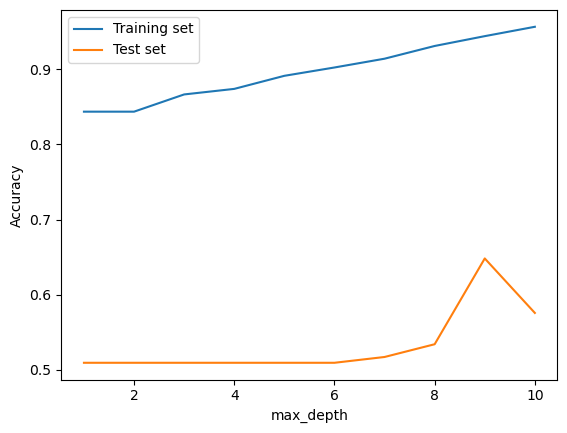

In [14]:
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model.fit(features, target)
    train_predictions = model.predict(features)
    test_predictions = model.predict(test_features)
    print("Exactitud de max_depth igual a", depth)
    print("Conjunto de entrenamiento:", accuracy_score(target, train_predictions))
    print("Conjunto de prueba:", accuracy_score(test_target, test_predictions))
    print()

# plot

train_accuracies = []
test_accuracies = []

for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features, target)
    train_predictions = model.predict(features)
    test_predictions = model.predict(test_features)
    train_accuracies.append(accuracy_score(target, train_predictions))
    test_accuracies.append(accuracy_score(test_target, test_predictions))

plt.plot(range(1, 11), train_accuracies, label='Training set')

plt.plot(range(1, 11), test_accuracies, label='Test set')

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ¿ Cómo se puede resolver?

* Compensar el sobreajuste de un modelo dividiendo los datos en conjuntos de entrenamiento y validación.
* Cambiar los hiperparámetros del modelo.
* Entrenar modelos de regresión de bosque aleatorio y logística.
* Comparar la calidad de los modelos resultantes para escoger el más adecuado.

### División de los datos

El dataset de validación se separa del dataset fuente antes de que se entrene el modelo. De otro modo, el modelo sabría todas las respuestas antes de aprender del conjunto de entrenamiento. 

La validación muestra cómo se comporta el modelo en el campo y ayuda a revelar si hay sobreajuste.

La parte de los datos que se va a asignar al conjunto de validación depende del número de observaciones y características, así como de la variación de los datos. Estos son los dos escenarios más comunes:

1) El conjunto de prueba existe (o existirá en el futuro cercano) pero no está disponible por el momento. La proporción ideal es 3:1. Esto significa que un 75 % es para el conjunto de entrenamiento y un 25 % es para el conjunto de validación. 

2) El conjunto de prueba no existe. En ese caso los datos fuente deben dividirse en tres partes: entrenamiento, validación y prueba. Usualmente, el tamaño del conjunto de validación y del de prueba son iguales. Esto da como resultado una proporción de datos fuente de 3:1:1   

In [15]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasets/train_house_price.csv')

df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']


train_features, test_features, train_target, test_target =  train_test_split(features,target , test_size=0.25, random_state=12345)

print(train_features.shape)
print(test_features.shape)
print(train_target.shape)
print(test_target.shape)


(4871, 13)
(1624, 13)
(4871,)
(1624,)


## Hiperparámetros

Además de los parámetros de modelo regulares, tenemos hiperparámetros. Estos son configuraciones para algoritmos de aprendizaje. Por ejemplo, en el árbol de decisión, uno de los ejemplos es el parámetro de profundidad máxima. Otro son las opciones de criterio: Gini/entropía 

Los hiperparámetros también ayudan a mejorar el modelo y se pueden ajustar antes del entrenamiento.


In [16]:
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    predictions_valid = model.score(test_features, test_target)
    print('max_depth =', depth, ': ', end='')
    print(predictions_valid)


max_depth = 1 : 0.8522167487684729
max_depth = 2 : 0.8522167487684729
max_depth = 3 : 0.8466748768472906
max_depth = 4 : 0.8725369458128078
max_depth = 5 : 0.8663793103448276
max_depth = 6 : 0.8706896551724138
max_depth = 7 : 0.8657635467980296
max_depth = 8 : 0.8700738916256158
max_depth = 9 : 0.8669950738916257
max_depth = 10 : 0.8614532019704434


## DecisionTreeClassifier parámtros

    DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Todos los hiperparámetros del algoritmo están dentro de los paréntesis.

* **min_samples_split**: Este hiperparámetro determina el número mínimo de observaciones que se deben tener en un nodo antes de que pueda dividirse. Su objetivo es evitar la creación de nodos que contengan un número insuficiente de observaciones del conjunto de entrenamiento.

* **min_samples_leaf**: Este hiperparámetro establece el número mínimo de observaciones que debe tener una hoja, es decir, un nodo final sin divisiones. Su propósito es prevenir que el algoritmo genere nodos hoja con un número insuficiente de observaciones del conjunto de entrenamiento.


In [17]:
best_score = 0
best_est = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    score = model.score(test_features, test_target)
    if score > best_score:
        best_score = score
        best_est = depth

print("La exactitud del mejor modelo en el conjunto de validación (n_estimators = {}): {}".format(best_est, best_score))

La exactitud del mejor modelo en el conjunto de validación (n_estimators = 4): 0.8725369458128078


## Índice de Gini 

El índice de Gini es una medida de pureza utilizada en la construcción de árboles de decisión en aprendizaje automático. Se utiliza para evaluar la calidad de una división o partición de los datos en diferentes grupos o nodos.

El índice de Gini mide la probabilidad de que una característica específica se clasifique incorrectamente cuando se selecciona al azar.


\begin{equation}
Gini = 1 - \sum_{i=1}^{n}(P_i)^2
\end{equation}

Donde $P_i$ es la probabilidad de que un elemento se clasifique en el grupo no adecuado y $n$ es el número total de clases.

* Un índice de Gini de 0 indica una pureza perfecta (todos los elementos pertenecen a una sola clase).

* Un índice de Gini de 0.5 indica una impureza máxima (los elementos están distribuidos uniformemente entre las clases).

El índice de Gini se utiliza para seleccionar la mejor característica y el mejor punto de corte para dividir los datos en un árbol de decisión, buscando minimizar la impureza en cada división.



## Entropía.

La entropía mide la incertidumbre asociada con una variable aleatoria. Se utiliza para determinar la homogeneidad de los datos en un nodo.

\begin{equation}
E(S) = \sum_{i=1}^{c} -p_i~log_2~(p_i)
\end{equation}

Donde $P_i$ es la probabilidad de que un elemento pertenezca a la clase $i$ y $n$ es el número total de clases.

* Una entropía de 0 indica una pureza perfecta (todos los elementos pertenecen a una sola clase).
* Una entropía alta indica una mayor impureza (los elementos están distribuidos más uniformemente entre las clases).

La entropía se utiliza para seleccionar la mejor característica y el mejor punto de corte para dividir los datos en un árbol de decisión, buscando minimizar la incertidumbre en cada división.

Elegir entre el índice de Gini y la entropía depende de varios factores, incluyendo la naturaleza de los datos y las preferencias específicas del problema que estás tratando de resolver. 

### Índice de Gini:

* Velocidad: El cálculo del índice de Gini es generalmente más rápido que el de la entropía, ya que no involucra el cálculo de logaritmos.
* Interpretación: Es más intuitivo y fácil de interpretar en términos de probabilidad de clasificación incorrecta.
* Uso común: Es la medida predeterminada en muchos algoritmos de árboles de decisión, como el algoritmo CART (Classification and Regression Trees).

### Entropía:

* Precisión: La entropía puede ser más precisa en algunos casos, ya que mide la cantidad de información o incertidumbre en los datos.
* Teoría de la información: Está basada en la teoría de la información y puede ser más adecuada si estás interesado en la cantidad de información ganada por cada división.
* Uso común: Es la medida utilizada en el algoritmo ID3 (Iterative Dichotomiser 3) 

### Consideraciones prácticas:

* Pruebas empíricas: A menudo, la mejor manera de decidir es probar ambos criterios en tu conjunto de datos y comparar los resultados. Puedes evaluar el rendimiento del modelo utilizando métricas como la precisión, la exactitud, la sensibilidad, etc.
* Naturaleza de los datos: Si tus datos tienen muchas características con distribuciones muy desiguales, la entropía podría ser más adecuada. Si buscas una solución más rápida y eficiente, el índice de Gini podría ser preferible.

In [18]:
# Ejemplo gini vs entropia

model_gini = DecisionTreeClassifier(random_state=12345, criterion='gini')
model_gini.fit(train_features, train_target)
predictions_gini = model_gini.predict(test_features)

model_entropy = DecisionTreeClassifier(random_state=12345, criterion='entropy')
model_entropy.fit(train_features, train_target)
predictions_entropy = model_entropy.predict(test_features)

print('Accuracy (gini):', accuracy_score(test_target, predictions_gini))
print('Accuracy (entropy):', accuracy_score(test_target, predictions_entropy))

Accuracy (gini): 0.8516009852216748
Accuracy (entropy): 0.8485221674876847


## Optimización de hiperparámetros

**Grid Search** es una técnica de optimización de hiperparámetros utilizada en el aprendizaje automático para encontrar la mejor combinación de parámetros para un modelo. Esta técnica realiza una búsqueda exhaustiva sobre un espacio especificado de parámetros, evaluando todas las combinaciones posibles para identificar la que produce el mejor rendimiento del modelo.

Cómo funciona Grid Search:

1. Definir el espacio de búsqueda: Especificas un conjunto de valores posibles para cada hiperparámetro que deseas optimizar.
2. Entrenar y evaluar: Para cada combinación de hiperparámetros, el modelo se entrena y se evalúa utilizando una métrica de rendimiento (por ejemplo, precisión, F1-score, etc.).
3. Seleccionar la mejor combinación: La combinación de hiperparámetros que produce el mejor rendimiento se selecciona como la óptima.

In [19]:
# Importamos las librerias para la creacion del modelo
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = DecisionTreeClassifier()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con Grid Search
grid_search.fit(train_features, train_target)

# Imprimir los mejores hiperparámetros y el mejor puntaje
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)
# Definir el clasificador y los valores de los hiperparámetros a probar

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mejor precisión: 0.877848891696941


              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       835
         1.0       0.87      0.87      0.87       789

    accuracy                           0.87      1624
   macro avg       0.87      0.87      0.87      1624
weighted avg       0.87      0.87      0.87      1624



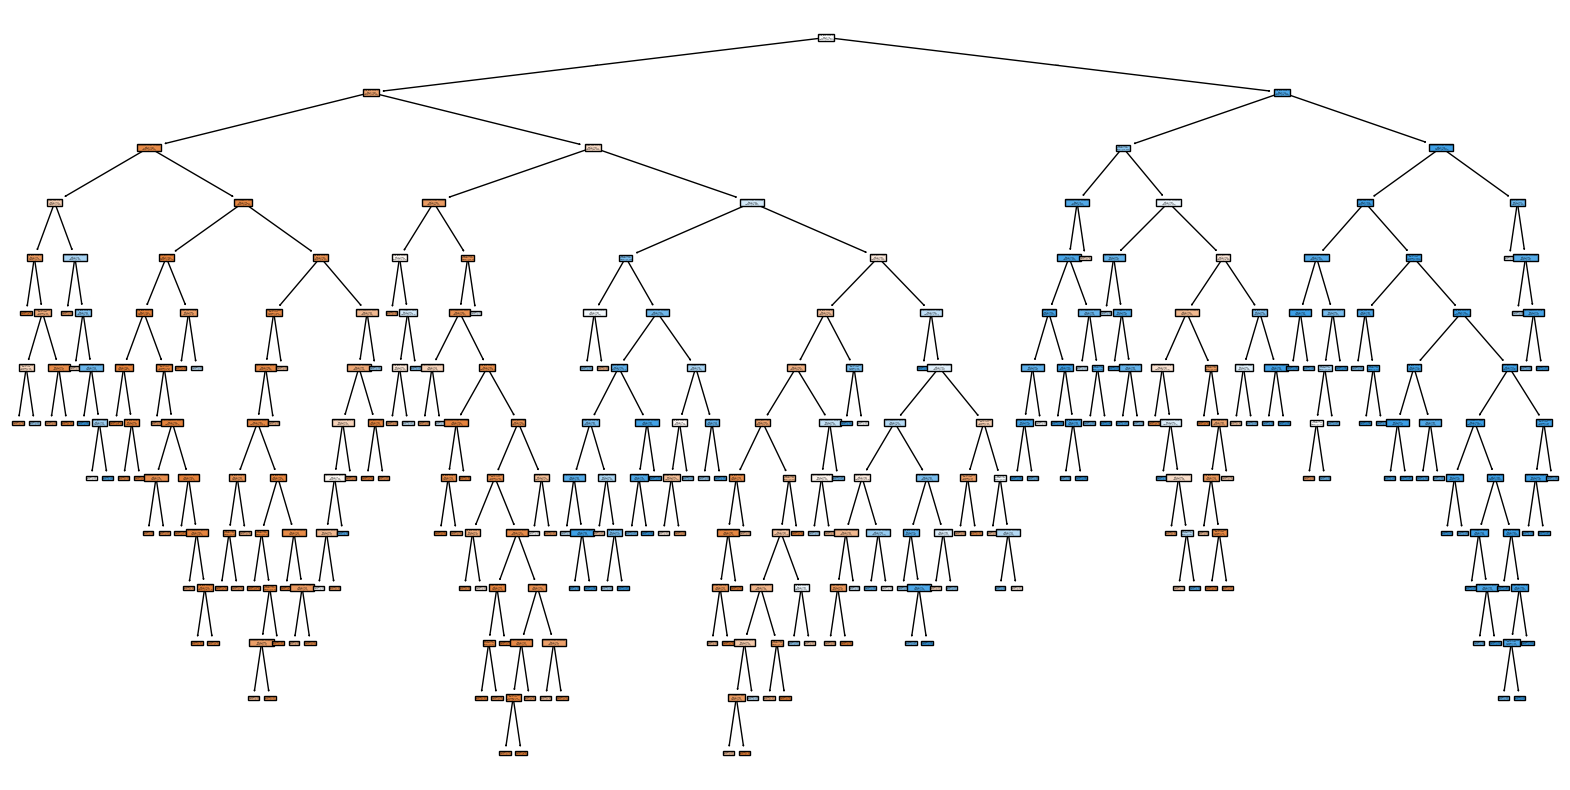

In [20]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

# Modelo decision tree con parametros optimizados
best_model = grid_search.best_estimator_
# Predictions
predictions = best_model.predict(test_features)
# Accuracy
print(classification_report(test_target, predictions))
# Graficar árbol

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=features.columns)
plt.show()

https://bookdown.org/keilor_rojas/CienciaDatos/introducci%C3%B3n-a-ciencia-de-datos-en-python.html

https://tripleten.com/trainer/data-scientist/

## Importancia de las caracteristicas

En un modelo de árbol de decisión (o en un conjunto de árboles como en un bosque aleatorio) proporciona una medida de la importancia de cada característica en la predicción del modelo. Esta importancia se calcula en función de la reducción de la impureza (por ejemplo, el índice de Gini o la entropía) que cada característica proporciona en los nodos de decisión del árbol.

1. Reducción de la impureza: Cada vez que una característica se utiliza para dividir un nodo en el árbol, contribuye a la reducción de la impureza del nodo (por ejemplo, reducción del índice de Gini o de la entropía).
2. Promedio ponderado: La importancia de una característica es la suma de las reducciones de impureza que proporciona en todos los nodos, ponderada por el número de muestras que pasan por esos nodos.



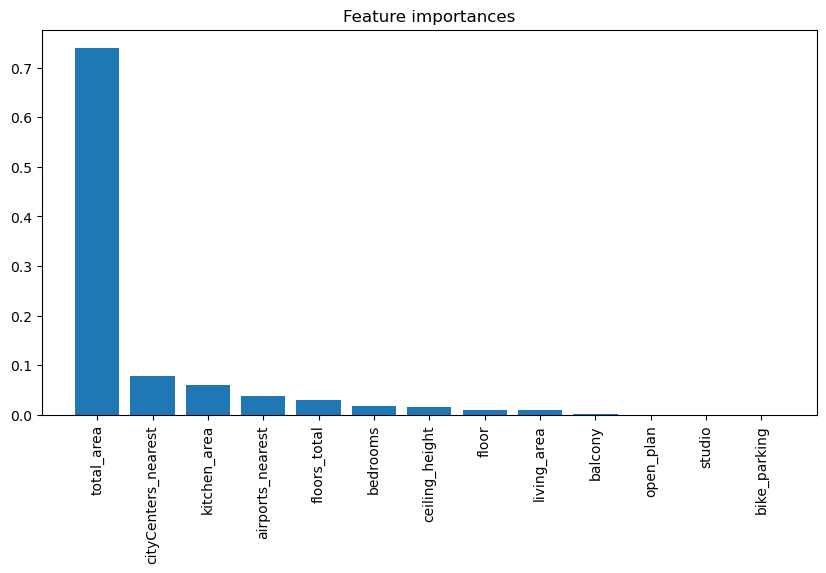

In [21]:
# Mostrar la importancia de las características

importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, features.shape[1]])
plt.show()

## Representación textual de los nodos de un árbol de decisión

Exactitud
Training set: 0.8435719784449577


[Text(0.5, 0.75, 'x[0] <= 60.75\ngini = 0.5\nsamples = 6495\nvalue = [3258, 3237]'),
 Text(0.25, 0.25, 'gini = 0.322\nsamples = 3758\nvalue = [3000, 758]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.171\nsamples = 2737\nvalue = [258, 2479]'),
 Text(0.625, 0.5, '  False')]

<Figure size 2000x1000 with 0 Axes>

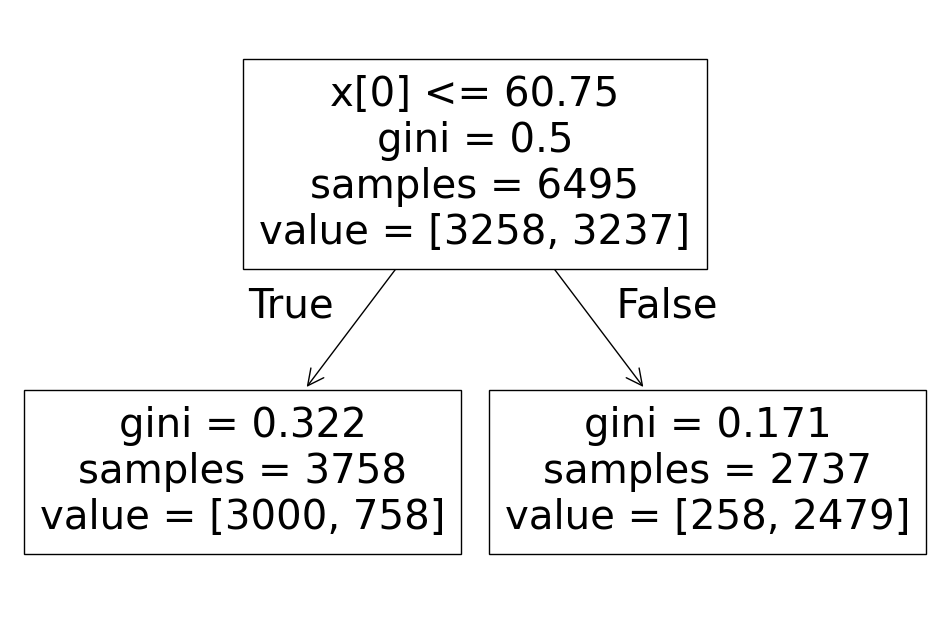

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('./datasets/train_house_price.csv')

df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

model = DecisionTreeClassifier(random_state=12345, max_depth=1, criterion='gini')

model.fit(features, target)

train_predictions = model.predict(features)

print('Exactitud')
print('Training set:', accuracy_score(target, train_predictions))

plt.figure(figsize=(20, 10))

# Graficar árbol
plt.figure(figsize = (12,8))
from sklearn import tree

tree.plot_tree(model)



Nodo raíz:

    x[0] <= 60.75, gini = 0.5, samples = 6495, value = [3258, 3237]

* **Condiciones de división:** x[0] <= 60.75: x[0] se refiere a la primera característica (columna) en el conjunto de datos (total_area). Si el valor de esta característica es menor o igual a 60.75, el nodo se divide.
* **Índice de Gini:** gini = 0.5: Mide la impureza. Un valor de 0.5 indica máxima impureza (distribución uniforme de clases).
* **Número de muestras:** Número de muestras: samples = 6495: El número de muestras que llegan a este nodo.
* **Distribución de clases:** value = [3258, 3237]: Hay 3258 muestras de la clase 0 y 3237 muestras de la clase 1.

El valor 60.75 es un umbral de división seleccionado automáticamente por el algoritmo del árbol de decisión durante el proceso de entrenamiento. Este valor se elige para maximizar la separación de las clases en el conjunto de datos en función del criterio de impureza especificado (en este caso, el índice de Gini).

Proceso de selección del umbral:

Evaluación de posibles divisiones: Para cada característica en el conjunto de datos, el algoritmo considera todos los posibles puntos de división. Estos puntos suelen ser los valores medios entre pares consecutivos de valores únicos de la característica.

Cálculo de la impureza: Para cada posible punto de división, el algoritmo calcula la impureza resultante (por ejemplo, el índice de Gini) de las dos particiones resultantes del conjunto de datos.

Selección del mejor umbral: El algoritmo selecciona el punto de división que minimiza la impureza en las particiones resultantes. Este es el umbral que mejor separa las clases en ese nodo del árbol.

## Condición de división

1. Para cada característica en el conjunto de datos, el algoritmo evalúa diferentes valores posibles de umbral (también llamados puntos de corte) que puedan dividir el conjunto de datos en dos subconjuntos.

* En general, se prueban los valores entre los puntos medios de los datos ordenados, evaluando si es mejor dividir con un valor mayor o menor que ese punto.

2. Calcular la métrica de impureza para cada división:

La métrica de impureza mide cuán bien una característica separa los datos. Las métricas más comunes son:

* Entropía: mide la incertidumbre de una característica en el conjunto. Su valor ideal es 0 (baja impureza).

* Reducción de la varianza: usada en árboles de regresión para minimizar la variación en cada grupo de datos resultante.

* Seleccionar el umbral con la mejor reducción de impureza


* Índice de Gini: mide la probabilidad de clasificar incorrectamente un elemento al elegirlo al azar. El valor ideal es 0.

### Por ejemplo, para el índice gini:


Dado un conjunto con etiquetas de clase, la probabilidad $p_i$ para cada clase
$i$ se calcula como:

$
p_i = \frac{\text{Número de elementos de la clase } i}{\text{Número total de elementos en el subconjunto}}
$

Por ejemplo, si en un subconjunto tenemos etiquetas **'Rojo', 'Rojo', 'Azul', 'Azul', 'Azul'** entonces:

- Para la clase "Rojo":
  
  $$
  p_{\text{Rojo}} = \frac{2}{5} = 0.4
  $$

- Para la clase "Azul":
  $$
  p_{\text{Azul}} = \frac{3}{5} = 0.6
  $$

El índice de Gini se calcula utilizando la fórmula:

$$
\text{Índice de Gini} = 1 - \sum_{i=1}^{n} p_i^2
$$

Sustituyendo los valores de $p_{\text{Rojo}}$ y $p_{\text{Azul}}$:

$$
\text{Índice de Gini} = 1 - \left( p_{\text{Rojo}}^2 + p_{\text{Azul}}^2 \right)
$$

$$
\text{Índice de Gini} = 1 - (0.4^2 + 0.6^2)
$$

$$
\text{Índice de Gini} = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48
$$

Por lo tanto, el índice de Gini para este subconjunto es \( 0.48 \).

Para cada característica y cada posible umbral, el algoritmo calcula la impureza de los subconjuntos resultantes.

El umbral que produce la mayor reducción de impureza se elige como el mejor para dividir el nodo actual.

3. Dividir el nodo:

Una vez elegido el mejor umbral y característica, el nodo se divide en dos subconjuntos que luego se evalúan en profundidad de manera recursiva hasta cumplir un criterio de parada (como alcanzar un nivel mínimo de impureza o una profundidad máxima del árbol).

Este proceso permite que el árbol de decisión seleccione el umbral óptimo de forma automática, adaptándose a las características del conjunto de datos para maximizar la precisión o minimizar el error.


## Ejemplo de selección de umbral con índice de Gini

Tenemos un conjunto de datos con una característica numérica feature y una etiqueta de clase label que indica si el objeto es "Red" o "Blue".Calcular el índice de Gini para cada posible umbral de división

Para cada punto medio entre valores consecutivos de la característica feature, vamos a calcular el índice de Gini resultante al dividir los datos. 


In [23]:
import pandas as pd
import numpy as np

''' 
gini_index: Calcula el índice de Gini de un conjunto de etiquetas.

weighted_gini_split: Calcula el índice de Gini ponderado de los 
subconjuntos después de dividir el conjunto de datos en un umbral dado.

threshold: Calcula el índice de Gini para cada posible umbral y 
selecciona el que minimiza la impureza. Al ejecutarlo, obtendrás el 
mejor umbral de división y su correspondiente índice de Gini. 
Este umbral se selecciona para maximizar la separación de las clases en 
este conjunto de datos de ejemplo.

El mejor umbral encontrado es 6.5, y al dividir los datos en ese punto, 
obtenemos un índice de Gini ponderado de aproximadamente 0.33. 
Esto significa que el umbral de 6.5 ofrece la mejor separación entre 
las clases en este conjunto de datos.

'''

# Crear un conjunto de datos de ejemplo con una característica 
# y la etiqueta de clase

data = pd.DataFrame({
    'feature': [2, 3, 10, 19, 25, 30, 45, 50],
    'target': ['Red', 'Red', 'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Blue']
})

# Función para calcular el índice de Gini de un conjunto de datos
def gini_index(target):
    classes, counts = np.unique(target, return_counts=True) # Contar las clases
    probs = counts / counts.sum()
    return 1 - np.sum(probs ** 2)

# Función para calcular el índice de Gini ponderado después de dividir los datos
def weighted_gini_split(data, feature, threshold):
    left_split = data[data[feature] <= threshold]
    right_split = data[data[feature] > threshold]
    
    # Calcular índice de Gini para cada subconjunto
    gini_left = gini_index(left_split['target'])
    gini_right = gini_index(right_split['target'])
    
    # Calcular proporciones para ponderar los índices de Gini
    left_weight = len(left_split) / len(data)
    right_weight = len(right_split) / len(data)
    
    # Índice de Gini ponderado
    weighted_gini = left_weight * gini_left + right_weight * gini_right
    return weighted_gini

# Crear una lista de posibles umbrales (puntos medios entre los valores ordenados de 'feature')
thresholds = [(data['feature'][i] + data['feature'][i + 1]) / 2 for i in range(len(data['feature']) - 1)]

# Calcular el índice de Gini para cada umbral y seleccionar el mejor
best_threshold = None
best_gini = float('inf')

for threshold in thresholds:
    gini = weighted_gini_split(data, 'feature', threshold)
    print(f"Umbral: {threshold}, Índice de Gini: {gini}")
    if gini < best_gini:
        best_gini = gini
        best_threshold = threshold
        
print()
print("Mejor umbral de división:", best_threshold)
print("Índice de Gini para el mejor umbral:", best_gini)


Umbral: 2.5, Índice de Gini: 0.42857142857142866
Umbral: 6.5, Índice de Gini: 0.3333333333333333
Umbral: 14.5, Índice de Gini: 0.4666666666666667
Umbral: 22.0, Índice de Gini: 0.5
Umbral: 27.5, Índice de Gini: 0.4666666666666667
Umbral: 37.5, Índice de Gini: 0.3333333333333333
Umbral: 47.5, Índice de Gini: 0.42857142857142866

Mejor umbral de división: 6.5
Índice de Gini para el mejor umbral: 0.3333333333333333


## Un árbol de decisión de regresión 

predecir valores continuos en lugar de categorías discretas. A diferencia de los árboles de decisión de clasificación, que predicen clases, los árboles de decisión de regresión predicen valores numéricos.

* División del conjunto de datos: Similar a los árboles de decisión de clasificación, los árboles de decisión de regresión dividen el conjunto de datos en subconjuntos más pequeños basados en condiciones en las características. Sin embargo, en lugar de minimizar la impureza (como el índice de Gini o la entropía), el objetivo es minimizar la varianza o el error cuadrático medio (MSE) en los subconjuntos resultantes.


Error cuadrático medio (MSE): 0.25
Predicciones: [1.5 6.5]


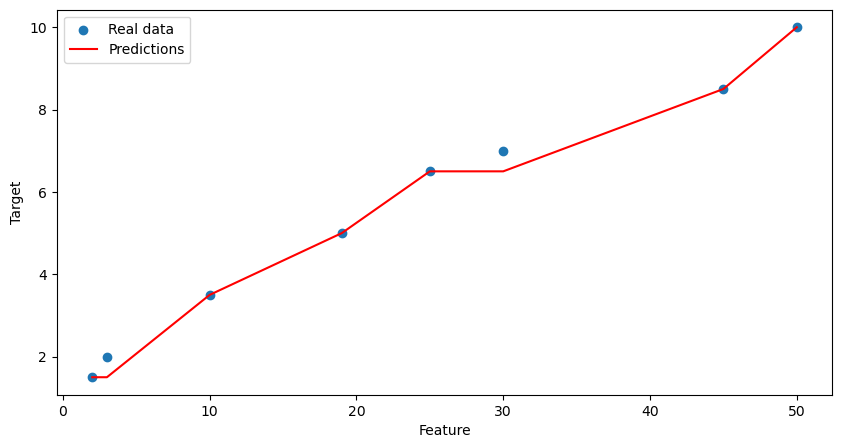

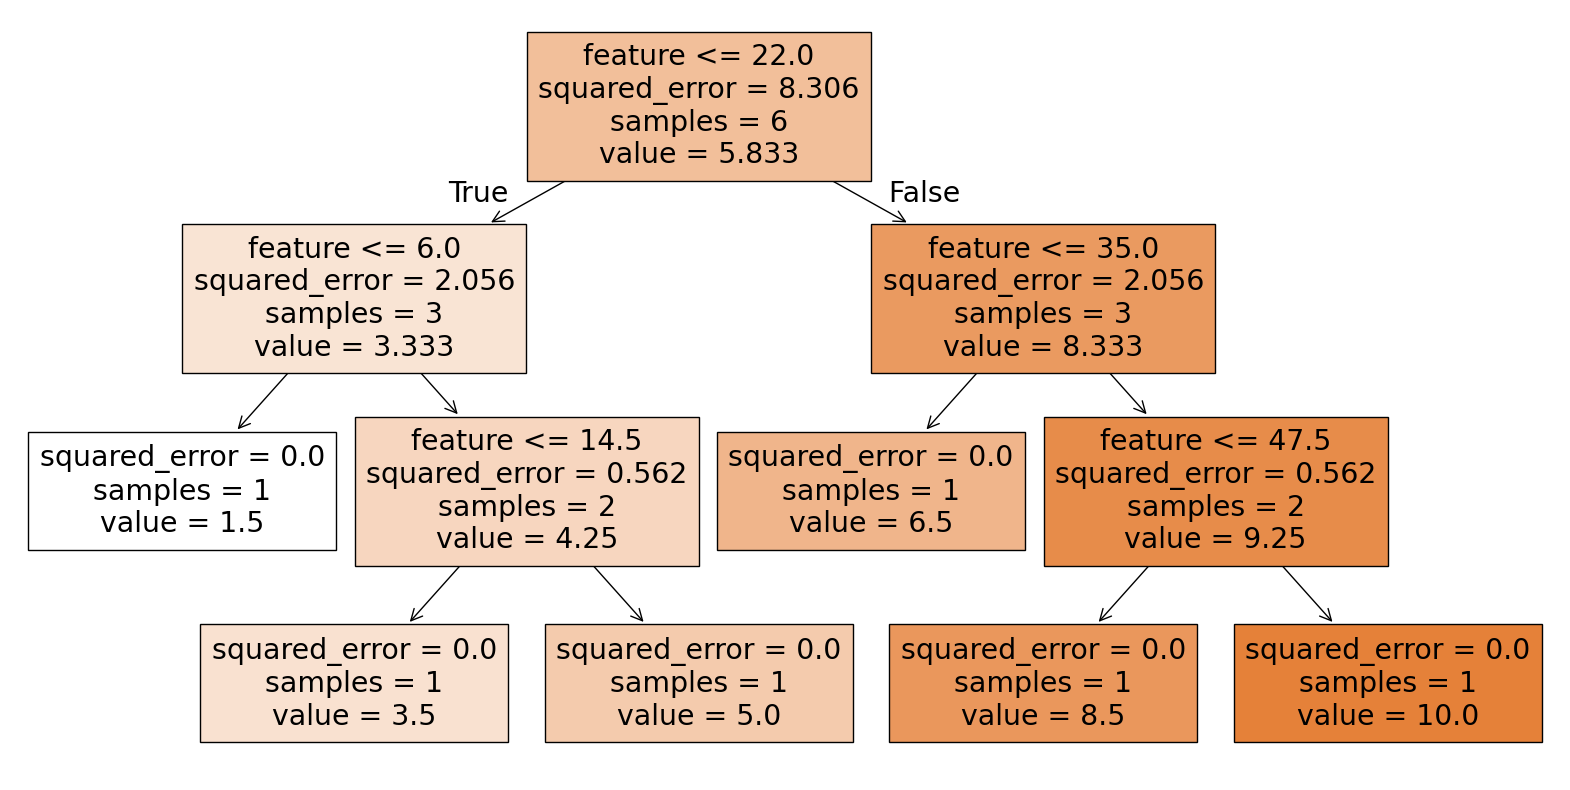

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Crear un conjunto de datos de ejemplo
data = pd.DataFrame({
    'feature': [2, 3, 10, 19, 25, 30, 45, 50],
    'target': [1.5, 2.0, 3.5, 5.0, 6.5, 7.0, 8.5, 10.0]
})

# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data[['feature']]
y = data['target']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión de regresión
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Imprimir las predicciones
print("Predicciones:", y_pred)

#plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.scatter(data['feature'], data['target'], label='Real data')
plt.plot(data['feature'], model.predict(data[['feature']]), color='red', label='Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

#plot tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=['feature'])
plt.show()
    


Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Mejor precisión: -2.7508063250256547
Raíz del error cuadrático medio (RECM): 2.1766388241805585


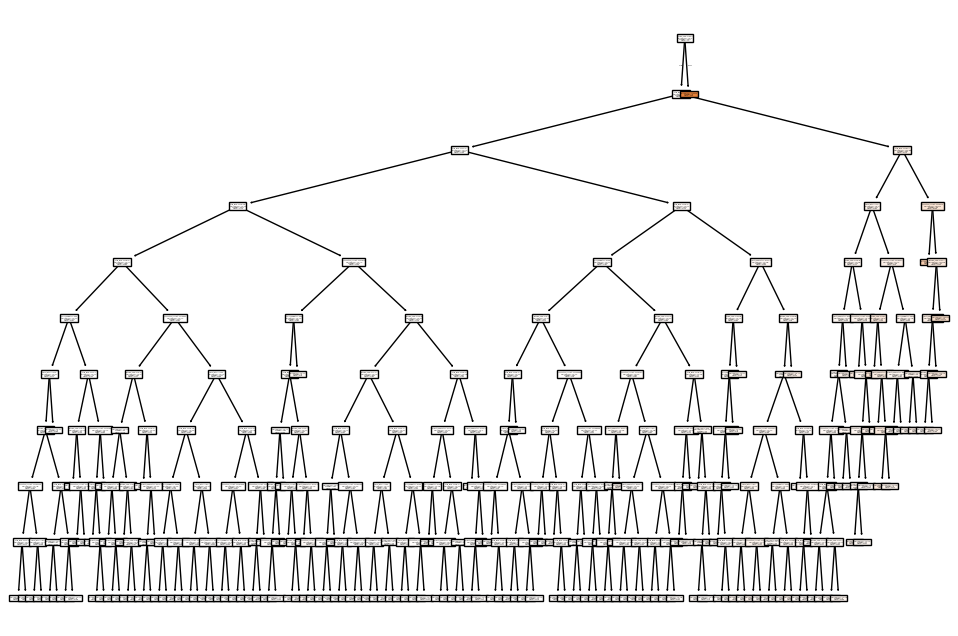

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

df = pd.read_csv('./datasets/train_house_price.csv')

df_train, df_valid = train_test_split(df, test_size=0.25, random_state=54321)

features_train = df_train.drop(['last_price'], axis=1)
# Dividimos por 100000 para que los valores de last_price estén en el mismo rango que el resto de las variables
target_train = df_train['last_price'] / 100000 
features_valid = df_valid.drop(['last_price'], axis=1)
target_valid = df_valid['last_price'] / 100000


# Definir el modelo
model = DecisionTreeRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenar el modelo con Grid Search
grid_search.fit(features_train, target_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)
# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(features_valid)

# Calcular el error cuadrático medio (MSE)
error = mean_squared_error(target_valid, y_pred)**0.5
print("Raíz del error cuadrático medio (RECM):", error)


# Visualización del árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(best_model, feature_names=features_train.columns, filled=True)
plt.show()
